In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../cifar10_record_stats.csv')

In [33]:
# compute the mean of df

def compute_mean(df):
    """
    Computes the mean of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to compute the mean of.

    Returns:
    pd.DataFrame: A DataFrame with the mean of the input DataFrame.
    """
    return df.mean()

df.iloc[0, :]

Unnamed: 0                       0.000000
test_loss                        1.500000
test_acc                         0.647500
bs512_grad_norm_entire           0.679385
bs512_f0b0s_dot                  0.861777
bs512_f0b0s_e_error_norm         0.588705
bs512_f0b0s_bias_norm            0.401563
bs512_f1b1s_dot                  0.964472
bs512_f1b1s_e_error_norm         0.300860
bs512_f1b1s_bias_norm            0.188808
bs512_f2b2s_dot                  0.992603
bs512_f2b2s_e_error_norm         0.150164
bs512_f2b2s_bias_norm            0.084247
bs512_b20other23_dot             0.999935
bs512_b20other23_e_error_norm    0.032255
bs512_b20other23_bias_norm       0.007884
bs512_bf0other23_dot             0.999685
bs512_bf0other23_e_error_norm    0.093097
bs512_bf0other23_bias_norm       0.017061
bs512_bw0other23_dot             0.999637
bs512_bw0other23_e_error_norm    0.093728
bs512_bw0other23_bias_norm       0.018294
bs512_w0other23_dot              0.981297
bs512_w0other23_e_error_norm     0

In [34]:
mean.keys()

NameError: name 'mean' is not defined

In [35]:
bs_means = {}

time_frame = 0

time_df = df.iloc[time_frame, :]
# Define batch sizes to consider
batch_sizes = [4, 32, 64, 128, 256, 512, 2048]

# Iterate over each column in the DataFrame
for col in time_df.keys():
    # Check if the column name contains 'bs'
    if 'bs' in col:
        # Extract the batch size and tail
        bs_part = col.split('_')[0]  # e.g., 'bs512'
        tail = '_'.join(col.split('_')[1:])  # e.g., 'f2_b2_rnearest_False_bias'
        
        # Ensure the batch size is one of the considered sizes
        for bs in batch_sizes:
            if f'bs{bs}' in bs_part:
                # Initialize list for this batch size if not already done
                if bs not in bs_means:
                    bs_means[bs] = {}
                
                # Append the value to the list for this batch size
                bs_means[bs][tail] = time_df[col]

In [36]:
bs_means

{512: {'grad_norm_entire': 0.6793849468231201,
  'f0b0s_dot': 0.8617768287658691,
  'f0b0s_e_error_norm': 0.5887052655220032,
  'f0b0s_bias_norm': 0.4015630185604095,
  'f1b1s_dot': 0.964471697807312,
  'f1b1s_e_error_norm': 0.3008597751458486,
  'f1b1s_bias_norm': 0.1888079345226287,
  'f2b2s_dot': 0.9926027059555054,
  'f2b2s_e_error_norm': 0.150163733959198,
  'f2b2s_bias_norm': 0.0842469185590744,
  'b20other23_dot': 0.9999349117279052,
  'b20other23_e_error_norm': 0.0322554507603247,
  'b20other23_bias_norm': 0.0078843235969543,
  'bf0other23_dot': 0.9996849298477172,
  'bf0other23_e_error_norm': 0.0930974418918291,
  'bf0other23_bias_norm': 0.0170610696077346,
  'bw0other23_dot': 0.9996374249458312,
  'bw0other23_e_error_norm': 0.0937281722823778,
  'bw0other23_bias_norm': 0.0182942915707826,
  'w0other23_dot': 0.9812968373298644,
  'w0other23_e_error_norm': 0.3316302339235941,
  'w0other23_bias_norm': 0.1336377412080764,
  'b0other23_dot': 0.9992227554321288,
  'b0other23_e_erro

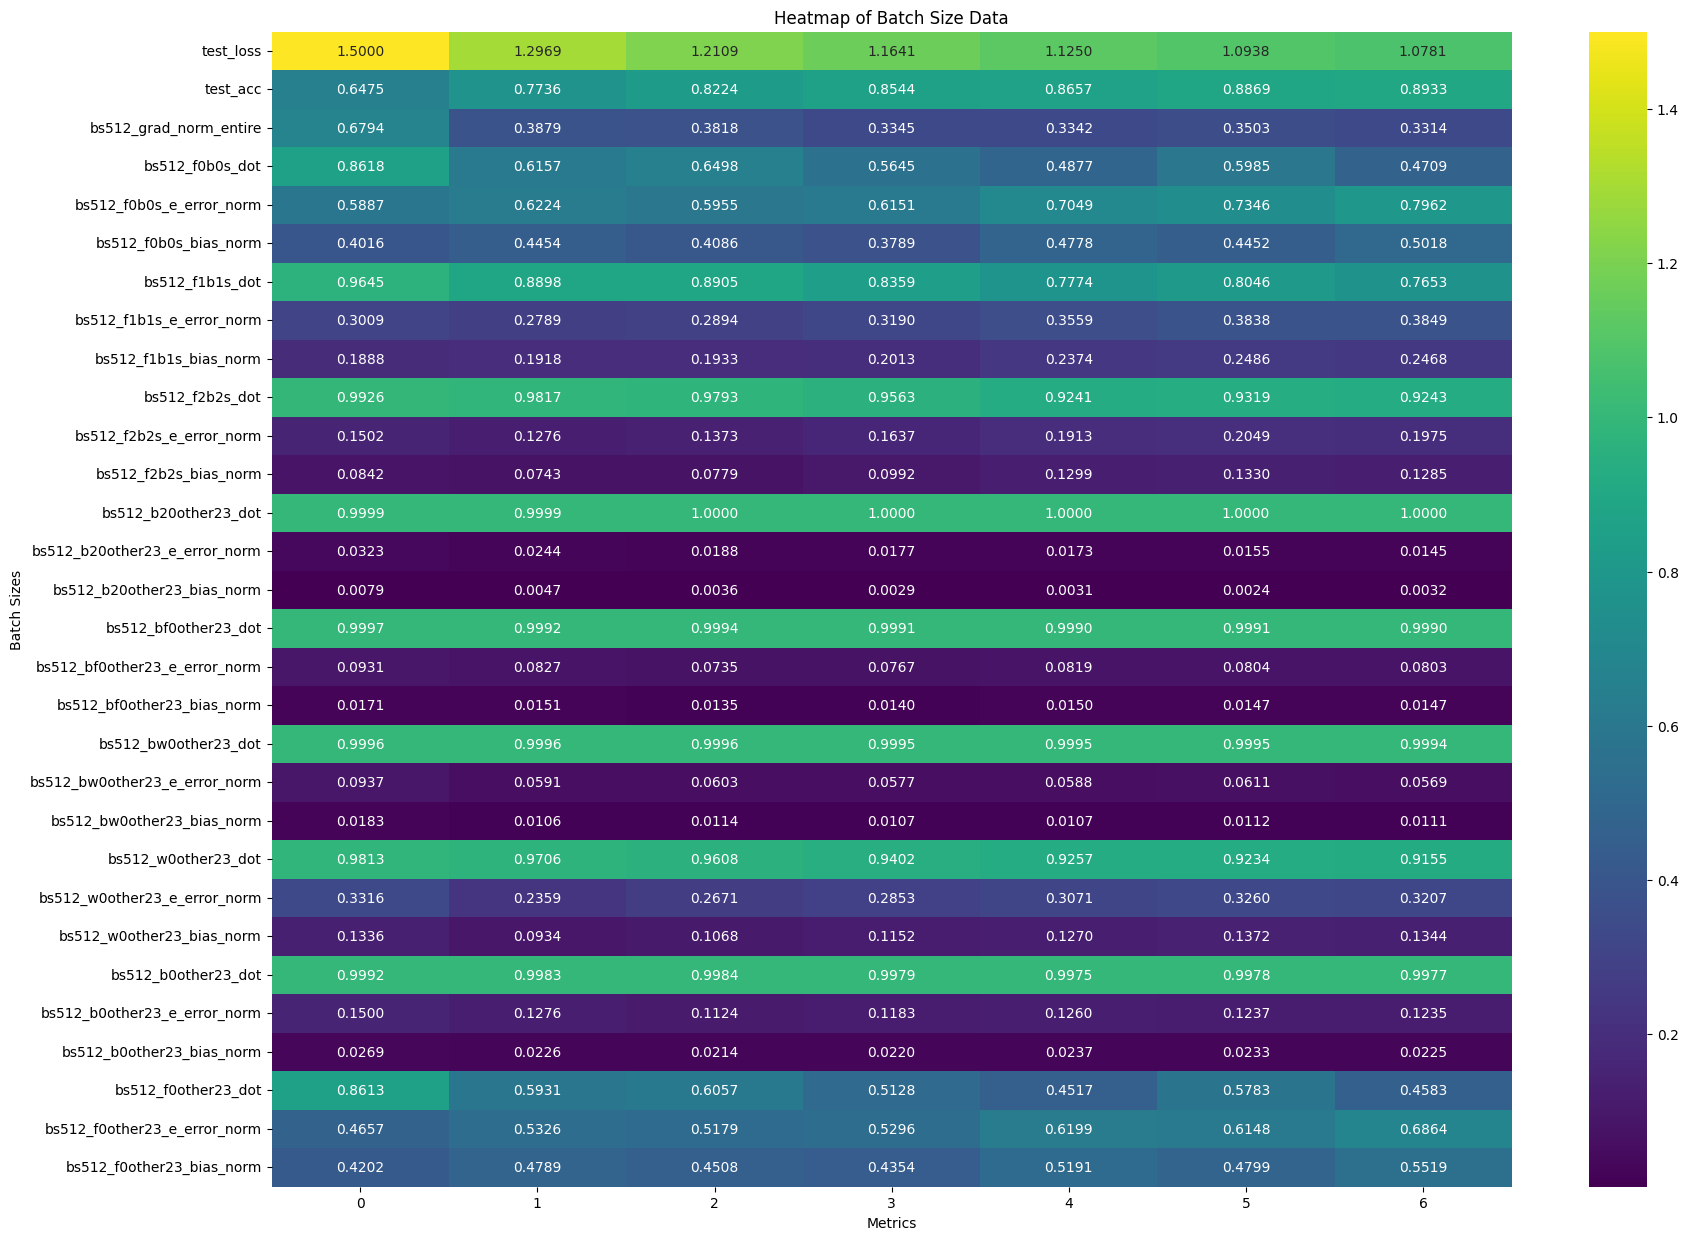

In [37]:
bs_means
import seaborn as sns

def plot_heatmap(data):
    # Convert the dictionary to a DataFrame
    data = data.drop(columns=['Unnamed: 0',]) #'test_loss', 'test_acc', 'bs512_grad_norm_entire'])
    df = pd.DataFrame(data).T

    # Create the heatmap
    plt.figure(figsize=(20, 15))
    sns.heatmap(df, annot=True, cmap='viridis', fmt=".4f")
    # plt.imshow(df, cmap='viridis', aspect='auto')

    plt.title('Heatmap of Batch Size Data')
    plt.xlabel('Metrics')
    plt.ylabel('Batch Sizes')
    plt.show()

plot_heatmap(df)


In [54]:
df_long

,Unnamed: 0,loss,acc,lr,test_loss,metrics,value,bs
0,0,2.125000,0.351562,0.03,2.078125,test_acc,0.378000,NaN
1,1,1.976562,0.484375,0.03,1.960938,test_acc,0.491000,NaN
2,2,1.914062,0.562500,0.03,1.835938,test_acc,0.637000,NaN
3,3,1.820312,0.648438,0.03,1.796875,test_acc,0.673000,NaN
4,4,1.765625,0.695312,0.03,1.812500,test_acc,0.651000,NaN
...,...,...,...,...,...,...,...,...
6549,53,1.484375,0.976562,0.03,1.507812,bs2048_f7_b7_rstochastic_False_bias,0.013198,NaN
6550,54,1.539062,0.921875,0.03,1.507812,bs2048_f7_b7_rstochastic_False_bias,0.018620,NaN
6551,55,1.515625,0.945312,0.03,1.500000,bs2048_f7_b7_rstochastic_False_bias,0.022346,NaN
6552,56,1.531250,0.929688,0.03,1.507812,bs2048_f7_b7_rstochastic_False_bias,0.017886,NaN


In [55]:
# 2d plot

# heatmap plot

def plot_2d(df, x, y):
    for x in bss:
        for y in 



x = ["bs4", "bs32", "bs64", "bs128", "bs256", "bs512", "bs2048"]
y = ["f0", "f1", "f2", "f3"] 

SyntaxError: invalid syntax (3641994309.py, line 7)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.backends
%matplotlib inline 
import matplotlib.pyplot as plt


def make_plot(df, dir, levels=10):
    # df = df.drop(columns=["method"])
    grouped_df = df.groupby(['act_man_width', 'batch_size']).mean().reset_index()
    df_avg = grouped_df
    # Pivot the data to create a grid for the contour plot
    pivot_table = df_avg.pivot_table(index='batch_size', columns='act_man_width', values='grad_norm_entire_ema')

    # Create a meshgrid for the contour plot
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values

    print(pivot_table.shape)
    print(pivot_table)

    # Pad the surrounding of Z with the same value as the edge (pad on the beginning side)
    Z = np.pad(Z, ((1, 0), (1, 0)), mode='edge')
    print(X.shape, Y.shape, Z.shape)

    # Update meshgrid to match the padded Z
    X, Y = np.meshgrid(
        np.insert(pivot_table.columns, 0, pivot_table.columns[0] - 1), 
        np.insert(pivot_table.index, 0, pivot_table.index[0] - 1)
    )

    # Create a 2D contour plot
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(X, Y, Z, levels=levels)
    plt.colorbar(cp, label='Norm')

    # Set the y-axis to log scale if needed
    # plt.yscale('log')  # Uncomment this line if the y-axis should be in log scale

    # Labeling the axes
    plt.xlabel('Mantissa Width')
    plt.ylabel('Batch Size')
    lr = df['lr'].iloc[0]
    plt.savefig(f"{dir}/{lr}.png")


In [38]:
ma_df = df.rolling(window=10).mean()

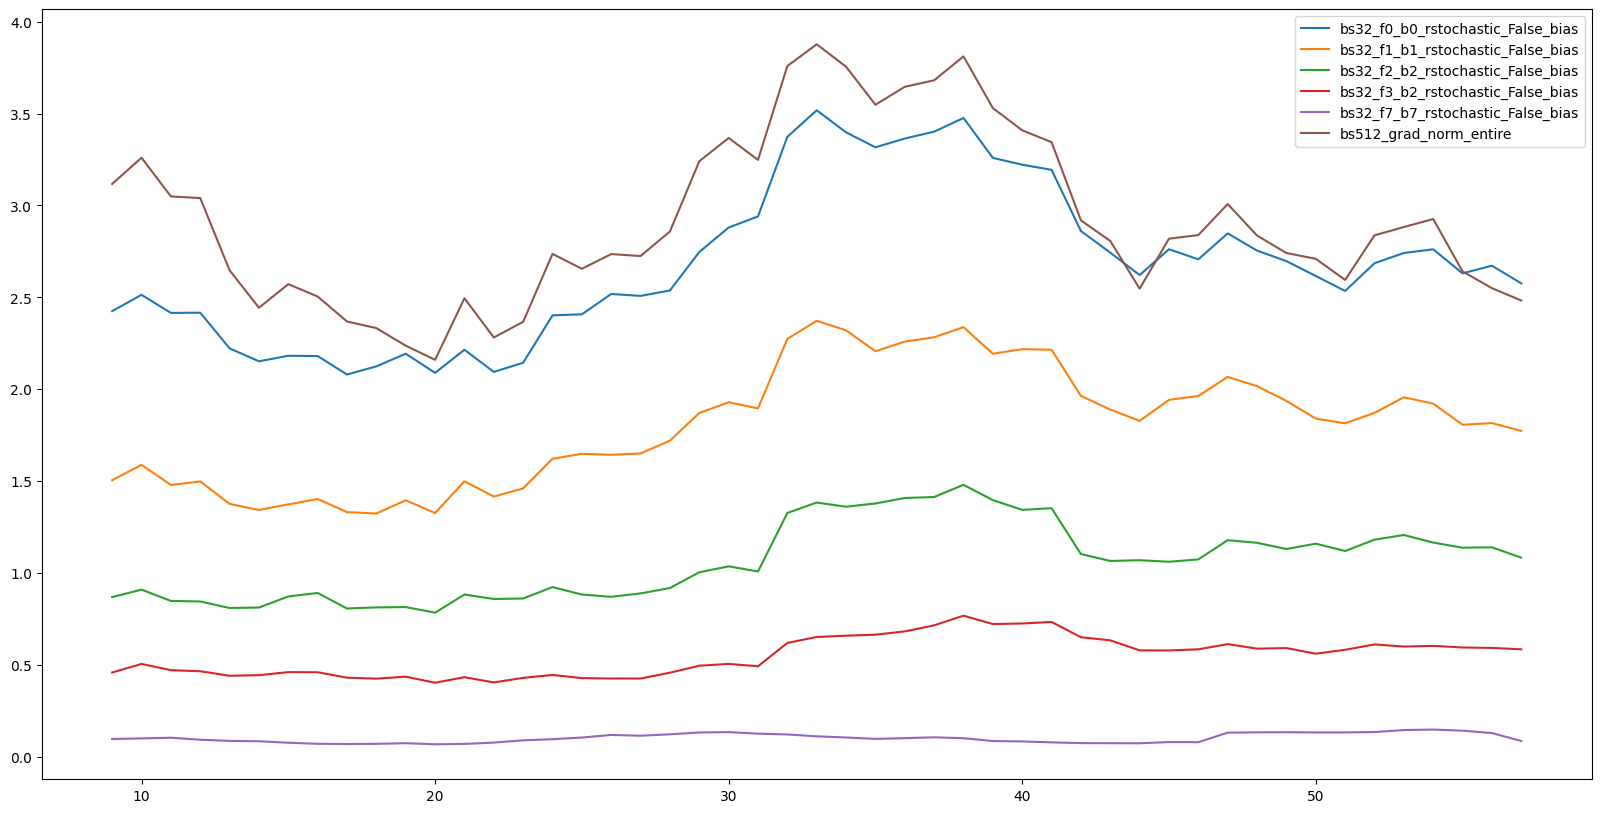

In [39]:
plt.figure(figsize=(20, 10))
for i in df.columns:
    if "bias" in i and "bs32" in i and "nearest" not in i:
        plt.plot(ma_df[i], label=i)
plt.plot(ma_df["bs32_grad_norm_entire"], label="bs512_grad_norm_entire")
plt.legend()

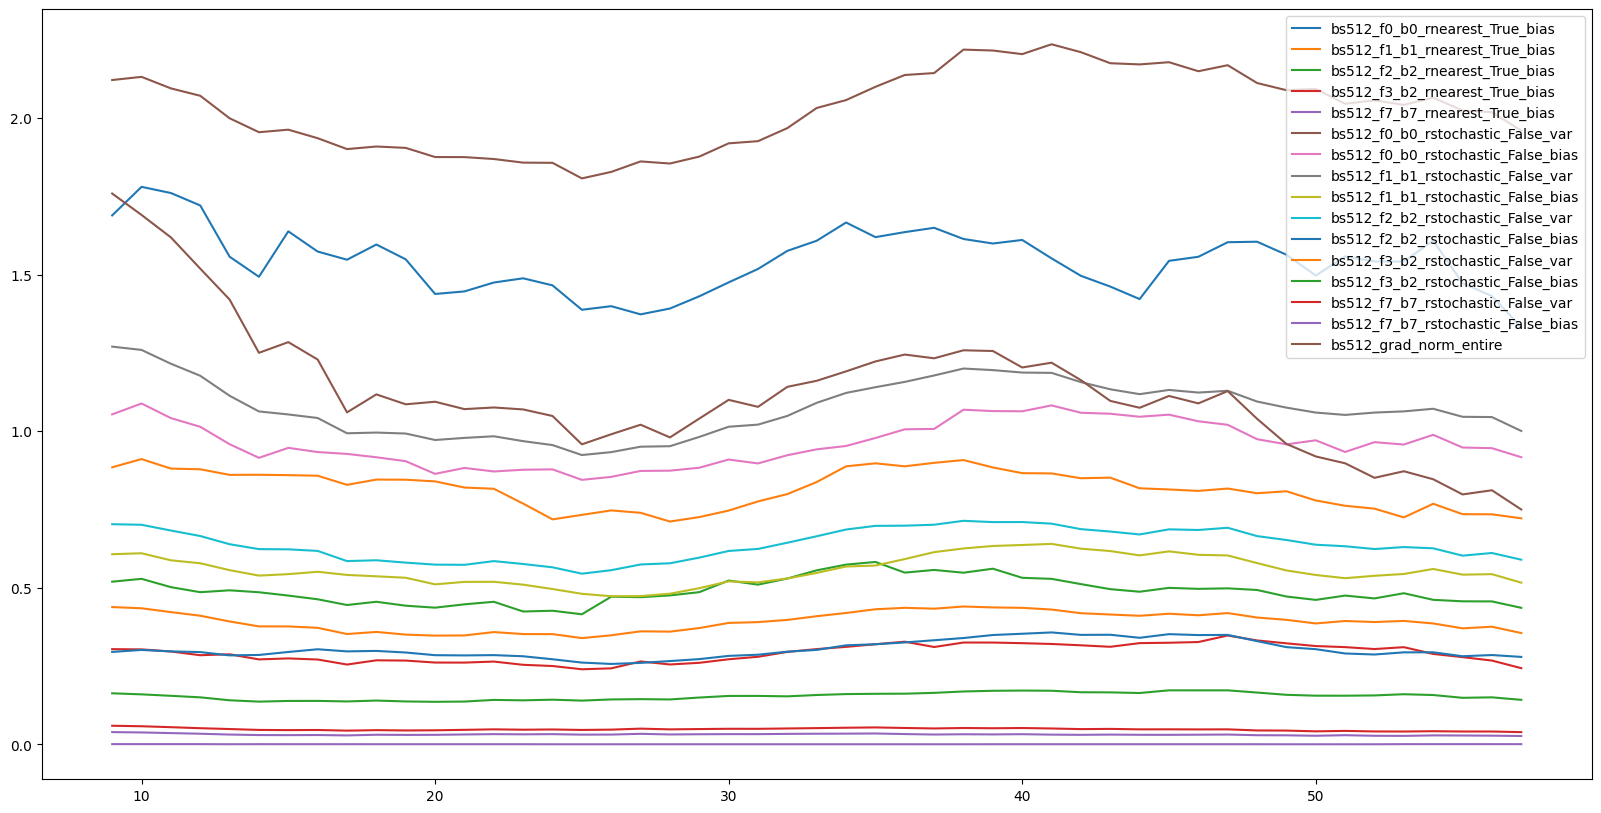

In [48]:
bs = "bs512"
f = "f2"
plt.figure(figsize=(20, 10))
for i in df.columns:
    if "var" in i and bs in i :
        plt.plot(ma_df[i], label=i)
    if "bias" in i and bs in i:
        plt.plot(ma_df[i], label=i)
plt.plot(ma_df[f"{bs}_grad_norm_entire"], label=f"{bs}_grad_norm_entire")
# plt.plot(ma_df["bs32_grad_norm_entire"], label="bs128_grad_norm_entire")
plt.legend()

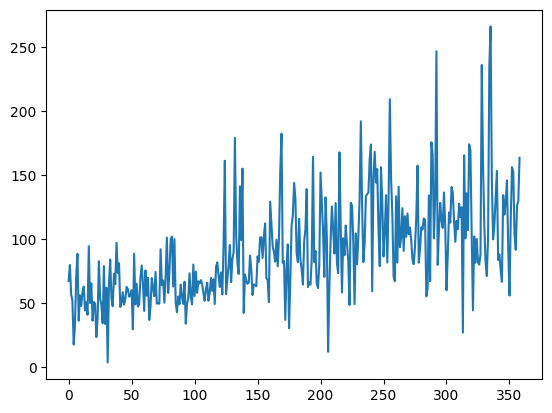

In [18]:
plt.plot(df["bs2048_abs_hessian"])